## Imports

In [62]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams.update({'font.size': 16})

In [63]:
x = torch.rand(20, 5)
x
((x.norm(dim=1) - 1).abs() < 1e-10).float()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Datasets

### Raw

In [64]:
input_dim = 1
output_dim = 1

A = 2 * np.random.rand(output_dim, input_dim) - 1
b = 2 * np.random.rand(output_dim) - 1

true_model = lambda x: A @ x + b

In [65]:
n_train = 1000
noise_level = 0.04

# Generate a random set of n_train samples
X_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model(x) for x in X_train])

# Add some noise
y_train += noise_level * np.random.standard_normal(size=y_train.shape)

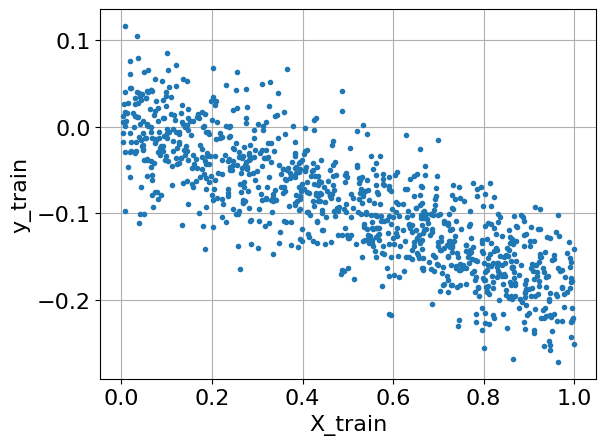

In [66]:
if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.plot(X_train, y_train, '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.set_ylabel('y_train')

### PyTorch Dataset

In [67]:
#%% Dataset to manage vector to vector data
class VectorialDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))
        
    def __len__(self):
        return self.input_data.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        sample = (self.input_data[idx, :], 
                  self.output_data[idx, :])  
        return sample 

In [68]:
training_set = VectorialDataset(input_data=X_train, output_data=y_train)

In [69]:
len(training_set)

1000

In [70]:
training_set[10:12]

(tensor([[0.6304],
         [0.8595]]),
 tensor([[-0.0725],
         [-0.1557]]))

### PyTorch DataLoader

In [71]:
batch_size = 120
train_loader = torch.utils.data.DataLoader(training_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [72]:
for idx, batch in enumerate(train_loader):
    print('Batch n. %2d: input size=%s, output size=%s' % (idx+1, batch[0].shape, batch[1].shape))

Batch n.  1: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  2: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  3: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  4: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  5: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  6: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  7: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  8: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  9: input size=torch.Size([40, 1]), output size=torch.Size([40, 1])


In [73]:
8 * 120

960

In [74]:
first_batch = []

for epoch in range(2):
    for idx, batch in enumerate(train_loader):
        if idx == 0:
            first_batch.append(batch)
        
np.c_[X_train[:batch_size], first_batch[0][0].numpy(), first_batch[1][0].numpy()]

array([[0.50712188, 0.26030332, 0.13382225],
       [0.20774888, 0.86181539, 0.93591261],
       [0.49197354, 0.77327263, 0.38843256],
       [0.54218368, 0.57750529, 0.93062288],
       [0.37306446, 0.13382225, 0.96332061],
       [0.89267477, 0.49647677, 0.56913179],
       [0.04319367, 0.42647916, 0.54435158],
       [0.38381345, 0.56607544, 0.2375585 ],
       [0.38588936, 0.35677785, 0.25566095],
       [0.73162919, 0.59178448, 0.29098782],
       [0.63035264, 0.01975855, 0.00361534],
       [0.85952529, 0.39524785, 0.30148721],
       [0.93591263, 0.32049069, 0.35975128],
       [0.96199616, 0.42655203, 0.82909602],
       [0.47815056, 0.8990286 , 0.28078613],
       [0.44117253, 0.69809347, 0.50712186],
       [0.61391715, 0.77948827, 0.52806383],
       [0.26461331, 0.0646906 , 0.28524131],
       [0.0882443 , 0.56272084, 0.74701339],
       [0.93359245, 0.97377861, 0.79964572],
       [0.68763521, 0.56187636, 0.26030332],
       [0.68512842, 0.12073793, 0.53835237],
       [0.

## Models

In [75]:
import torch.nn as nn
import torch

#%% Linear layer
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear = nn.Linear(self.input_dim, self.output_dim, bias=True)

    def forward(self, x):
        out = self.linear(x)
        return out
    
    def reset(self):
        self.linear.reset_parameters()

In [76]:
model = LinearModel(input_dim, output_dim)

In [77]:
model

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [78]:
model.parameters()

<generator object Module.parameters at 0x1678c73e0>

In [79]:
model.linear.weight

Parameter containing:
tensor([[-0.6986]], requires_grad=True)

In [80]:
model.linear.bias

Parameter containing:
tensor([-0.6115], requires_grad=True)

### Forward

In [82]:
x = torch.randn(5, input_dim)
model.forward(x)

tensor([[-0.5771],
        [-0.5916],
        [-1.8711],
        [-1.3440],
        [-1.3847]], grad_fn=<AddmmBackward0>)

In [83]:
[model.linear.weight @ xx + model.linear.bias for xx in x]

[tensor([-0.5771], grad_fn=<AddBackward0>),
 tensor([-0.5916], grad_fn=<AddBackward0>),
 tensor([-1.8711], grad_fn=<AddBackward0>),
 tensor([-1.3440], grad_fn=<AddBackward0>),
 tensor([-1.3847], grad_fn=<AddBackward0>)]

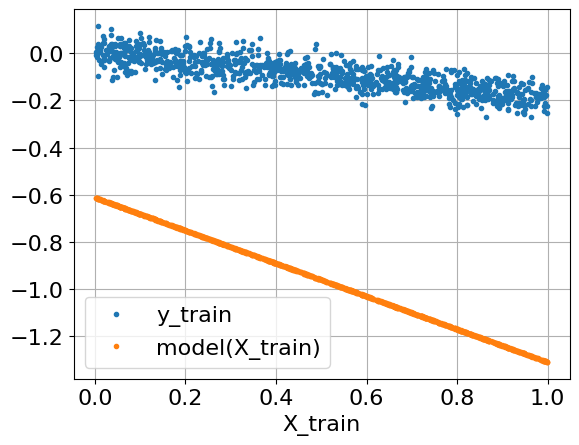

In [84]:
if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.plot(training_set.input_data, training_set.output_data, '.')
    ax.plot(training_set.input_data, model.forward(training_set.input_data).detach().numpy(), '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.legend(['y_train', 'model(X_train)'])    

## Loss

### MSE

In [85]:
import torch.nn as nn
loss_fun = nn.MSELoss(reduction='mean')

In [87]:
x = torch.tensor(np.array([1, 2, 1]).astype('f'))
z = torch.tensor(np.array([0, 0, 0]).astype('f'))
loss_fun(x, z)

tensor(2.)

### Score

IndexError: list index out of range

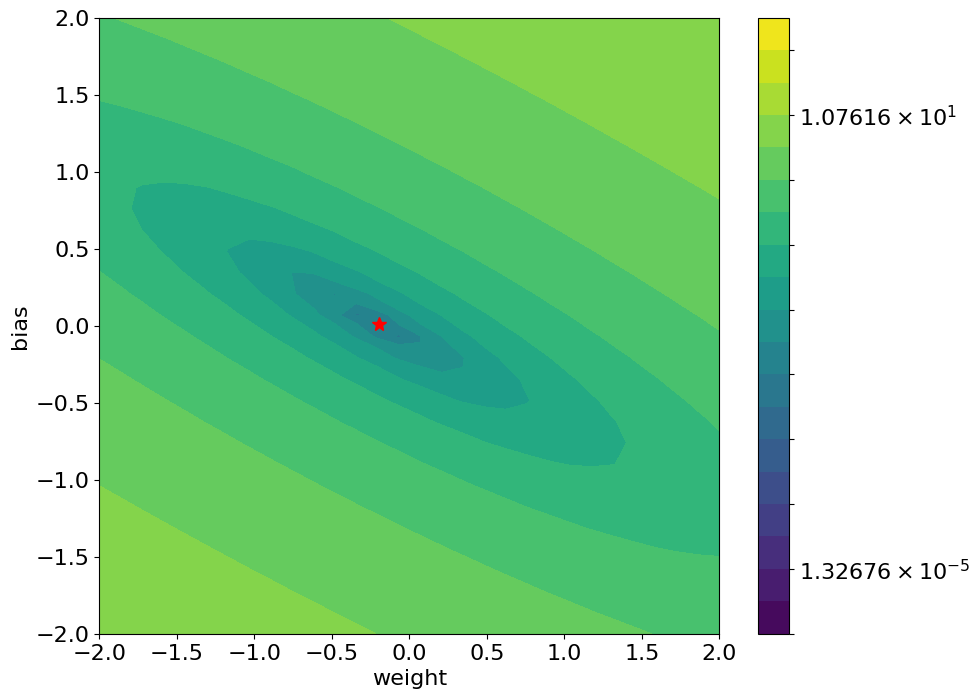

In [88]:
if input_dim == output_dim == 1:

    state_dict = model.state_dict()

    ww, bb = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

    loss_values = 0 * ww
    for i in range(ww.shape[0]):
        for j in range(ww.shape[1]):
            state_dict['linear.weight'] = torch.tensor([[ww[i, j]]])
            state_dict['linear.bias'] = torch.tensor([bb[i, j]])
            model.load_state_dict(state_dict)
            loss_values[i, j] = loss_fun(model.forward(training_set.input_data),  training_set.output_data)

    fig = plt.figure(figsize=(10, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    c=ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    plt.colorbar(c)
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_ylabel('bias')
    ax.set_xlabel('weight')
    ax.legend(['(A, b)'])
    
    ax.grid(True)    

## Optimization

### Gradients

In [89]:
x = torch.randn(1, input_dim)
y = torch.randn(1, output_dim)

model.zero_grad()
loss = loss_fun(model.forward(x),  y)
loss.backward()

In [90]:
if input_dim == output_dim == 1:
    print(model.linear.weight.grad)
    print(2 * x * (model.linear.weight * x + model.linear.bias - y))
    
    print(model.linear.bias.grad)
    print(2 * (model.linear.weight * x + model.linear.bias - y))

tensor([[-0.5373]])
tensor([[-0.5373]], grad_fn=<MulBackward0>)
tensor([0.9431])
tensor([[0.9431]], grad_fn=<MulBackward0>)


### Handmade Optimization

In [91]:
if input_dim == output_dim == 1:

    num_iter = 200
    lr = 0.5 # 0.01

    train_hist = {}
    train_hist['weight'] = []
    train_hist['bias'] = []

    model.reset()
    state_dict = model.state_dict()

    for _ in range(num_iter):

        model.zero_grad()
        loss = loss_fun(model.forward(training_set.input_data), training_set.output_data)
        loss.backward()

        w = model.linear.weight.item()
        b = model.linear.bias.item()

        dw = model.linear.weight.grad.item()
        db = model.linear.bias.grad.item()

        state_dict['linear.weight'] += torch.tensor([-lr * dw])
        state_dict['linear.bias'] += torch.tensor([-lr * db])
        model.load_state_dict(state_dict)

        train_hist['weight'].append(w)
        train_hist['bias'].append(b)

    for label in train_hist:
        train_hist[label] = np.array(train_hist[label])

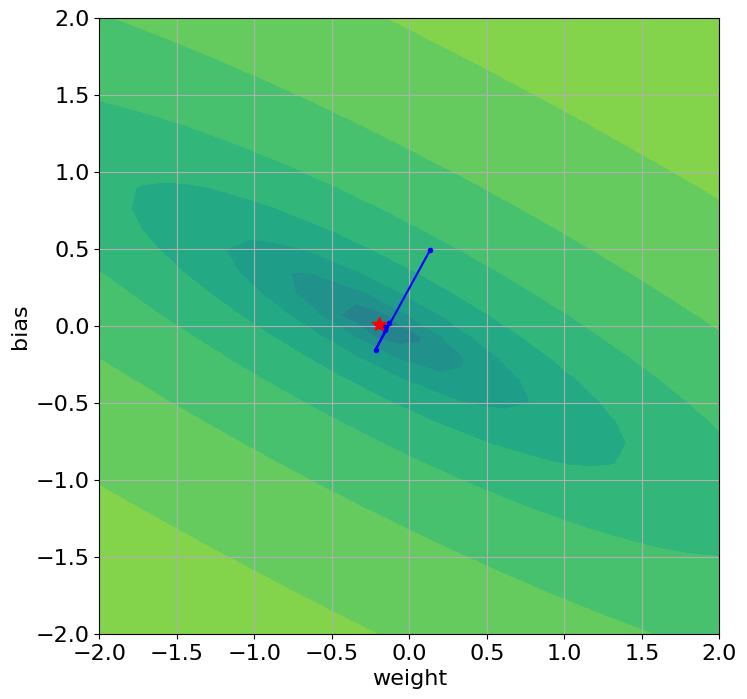

In [92]:
if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(8, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    ax.grid(True)
    ax.set_xlim(-2, 2) 
    ax.set_ylim(-2, 2) 
    
    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)

    #ax.legend(['optim', '(A, b)'])

### Stochastic Gradient Descent

In [93]:
lr = 0.1
weight_decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [94]:
n_epochs = 100

In [95]:
train_hist = {}
train_hist['loss'] = []

if input_dim == output_dim == 1:
    train_hist['weight'] = []
    train_hist['bias'] = []

# Initialize training
model.reset()
model.train()

for epoch in range(n_epochs):
    for idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        loss = loss_fun(model.forward(batch[0]),  batch[1])
        loss.backward()
        optimizer.step()

        train_hist['loss'].append(loss.item())
        if input_dim == output_dim == 1:
            train_hist['weight'].append(model.linear.weight.item())
            train_hist['bias'].append(model.linear.bias.item())
        
        print('[Epoch %4d/%4d] [Batch %4d/%4d] Loss: % 2.2e' % (epoch + 1, n_epochs, 
                                                                idx + 1, len(train_loader), 
                                                                loss.item()))
        
model.eval()

[Epoch    1/ 100] [Batch    1/   9] Loss:  4.05e-01
[Epoch    1/ 100] [Batch    2/   9] Loss:  2.50e-01
[Epoch    1/ 100] [Batch    3/   9] Loss:  1.30e-01
[Epoch    1/ 100] [Batch    4/   9] Loss:  5.95e-02
[Epoch    1/ 100] [Batch    5/   9] Loss:  4.20e-02
[Epoch    1/ 100] [Batch    6/   9] Loss:  4.00e-02
[Epoch    1/ 100] [Batch    7/   9] Loss:  5.89e-02
[Epoch    1/ 100] [Batch    8/   9] Loss:  1.02e-01
[Epoch    1/ 100] [Batch    9/   9] Loss:  9.89e-02
[Epoch    2/ 100] [Batch    1/   9] Loss:  9.97e-02
[Epoch    2/ 100] [Batch    2/   9] Loss:  9.02e-02
[Epoch    2/ 100] [Batch    3/   9] Loss:  7.52e-02
[Epoch    2/ 100] [Batch    4/   9] Loss:  5.46e-02
[Epoch    2/ 100] [Batch    5/   9] Loss:  3.42e-02
[Epoch    2/ 100] [Batch    6/   9] Loss:  2.45e-02
[Epoch    2/ 100] [Batch    7/   9] Loss:  1.61e-02
[Epoch    2/ 100] [Batch    8/   9] Loss:  1.86e-02
[Epoch    2/ 100] [Batch    9/   9] Loss:  1.66e-02
[Epoch    3/ 100] [Batch    1/   9] Loss:  2.38e-02
[Epoch    3/

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [96]:
if input_dim == output_dim == 1:
    n_test = 500
    X_test = np.random.rand(n_test, input_dim)
    y_pred = []

    state_dict = model.state_dict()

    for idx in range(len(train_hist['weight'])):
        state_dict['linear.weight'] = torch.tensor([[train_hist['weight'][idx]]])
        state_dict['linear.bias'] = torch.tensor([train_hist['bias'][idx]])
        model.load_state_dict(state_dict)

        y_pred.append(model.forward(torch.tensor(X_test.astype('f'))).detach().numpy())    

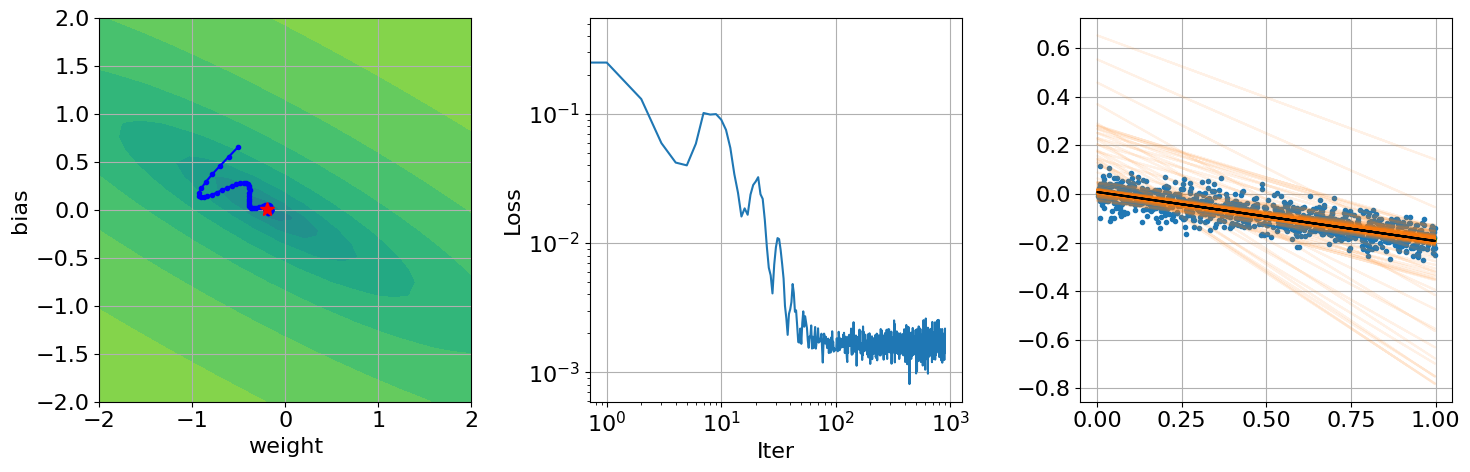

In [97]:
if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(15, 5))
    fig.clf()
    
    ax = fig.add_subplot(1, 3, 1)
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    #ax.legend(['optim', '(A, b)'])
    ax.grid(True)
    ax.set_xlim(-2, 2) 
    ax.set_ylim(-2, 2) 
    
    ax = fig.add_subplot(1, 3, 2)
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('Iter')
    ax.set_ylabel('Loss')
    ax.grid(True)
    
    ax = fig.add_subplot(1, 3, 3)
    ax.plot(X_train, y_train, '.')
    a=ax.plot(X_test, y_pred[0], '-', alpha=0.1)
    for y in y_pred[1:]:
        ax.plot(X_test, y, '-', alpha=0.1, color=a[0].get_color())
    ax.plot(X_test, y_pred[-1], 'k')
    ax.grid(True)   

    fig.tight_layout()

else:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('Iter')
    ax.set_ylabel('Loss')
    ax.grid(True)